In [2]:
import time
import numpy as np

In [3]:
def n_kron_product(matrix, n):
    result = matrix
    for i in range(n-1):
        result = np.kron(result, matrix)
    return result

def n_cnot_gate(n):
    dist = n - 2 # number of qubits between control and target qubit (in this case, always first and last qubit)

    sq_X = np.array([[0,1], [1,0]])

    N = 2 ** (dist+2)
    N_half = int(N/2)

    I_half_N = np.identity(N_half)

    Zero_half_N = np.zeros((N_half, N_half))

    I_quarter_N = np.identity(int(N/4))
    right_bottom_matrix = np.kron(I_quarter_N, sq_X)
    
    # print("I_half_N", I_half_N)
    # print("Zero_half_N", Zero_half_N)
    # print("RB", right_bottom_matrix)

    CX = np.block([[I_half_N, Zero_half_N],
                [Zero_half_N, right_bottom_matrix]])

    # print(CX)
    # print(np.kron(I, CX))  
    return CX 

In [5]:
# qubits = 15

# Define Single qubit state and gate
sq_ket_0 = np.array([1,0])
sq_ket_1 = np.array([0,1])

sq_I = np.array([[1,0], [0,1]])
sq_X = np.array([[0,1], [1,0]])
sq_H = 1/np.sqrt(2)*np.array([[1,1], [1,-1]])
dq_CNOT = np.array([[1,0,0,0],
                    [0,1,0,0],
                    [0,0,0,1],
                    [0,0,1,0],])



def quantum_simulator(qubits):

    start_time = time.time()
    # Define n qubits quantum gates
    n_sq_X = n_kron_product(sq_X, qubits)
    n_sq_H = n_kron_product(sq_H, qubits)
    n_cnot = n_cnot_gate(qubits)

    # Define n qubits statevectors
    n_statevector = n_kron_product(sq_ket_0, qubits)
    # print(n_statevector)

    result = n_cnot @ n_sq_H @ n_sq_X @ n_statevector
    end_time = time.time()
    runtime = end_time - start_time
    # print(result)

    return result, runtime



In [ ]:
qubits_range = np.arange(2,14,1)
print(qubits_range)

results_range = []
runtime_range = []

for qubit in qubits_range:
    result, runtime = quantum_simulator(qubit)
    results_range.append(result)
    runtime_range.append(runtime)
    print("qubits:", qubit, ", runtime:", runtime)

[ 2  3  4  5  6  7  8  9 10 11 12 13]
qubits: 2 , runtime: 0.0006308555603027344
qubits: 3 , runtime: 0.0009446144104003906
qubits: 4 , runtime: 0.001344442367553711
qubits: 5 , runtime: 0.001481771469116211
qubits: 6 , runtime: 0.0016176700592041016
qubits: 7 , runtime: 0.009150505065917969
qubits: 8 , runtime: 0.036102294921875
qubits: 9 , runtime: 0.04677534103393555
qubits: 10 , runtime: 0.18218135833740234
qubits: 11 , runtime: 0.7524557113647461
qubits: 12 , runtime: 4.090689182281494
qubits: 13 , runtime: 26.79066300392151


In [6]:
qubits_range = np.arange(14,16,1)
print(qubits_range)

results_range = []
runtime_range = []

for qubit in qubits_range:
    result, runtime = quantum_simulator(qubit)
    results_range.append(result)
    runtime_range.append(runtime)
    print("qubits:", qubit, ", runtime:", runtime)

[14 15]


: 

In [6]:
qubits_range = np.arange(2,16,1)
print(qubits_range)

results_range = []
runtime_range = []

for qubit in qubits_range:
    result, runtime = quantum_simulator(qubit)
    results_range.append(result)
    runtime_range.append(runtime)
    print("qubits:", qubit, ", runtime:", runtime)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
qubits: 2 , runtime: 0.0031213760375976562
qubits: 3 , runtime: 0.0012922286987304688
qubits: 4 , runtime: 0.0007071495056152344
qubits: 5 , runtime: 0.0006320476531982422
qubits: 6 , runtime: 0.0010907649993896484
qubits: 7 , runtime: 0.03438544273376465
qubits: 8 , runtime: 0.027975082397460938
qubits: 9 , runtime: 0.05743265151977539
qubits: 10 , runtime: 0.15770530700683594
qubits: 11 , runtime: 0.6224966049194336
qubits: 12 , runtime: 3.540508508682251
qubits: 13 , runtime: 24.29458785057068


: 

In [ ]:
print(runtime_range)

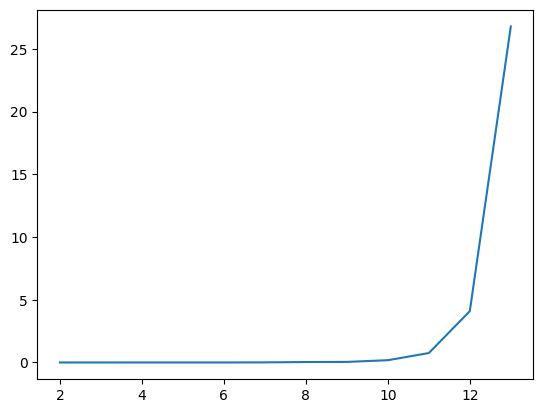

In [18]:
import matplotlib.pyplot as plt
plt.plot(qubits_range, runtime_range)